In [17]:
# Import library
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
%matplotlib inline

In [18]:
# Read in CSV file
csv_path = Path("../Data/house_prices_msa.csv")
house_price_raw = pd.read_csv(csv_path)
# index_col="RegionName"
# house_price_raw.drop(["RegionType"], axis = 1, inplace = True) 
# split the RegionName into City and State columns
house_price_raw[['City','State']] = house_price_raw.RegionName.str.split(",",expand=True)
# Reorder the state and city col to the first two col
city_col_name="City"
state_col_name="State"
region_col_name="RegionName"
first_col = house_price_raw.pop(city_col_name)
second_col = house_price_raw.pop(state_col_name)
third_col = house_price_raw.pop(region_col_name)
house_price_raw.insert(0, city_col_name, first_col)
house_price_raw.insert(1, state_col_name, second_col)
house_price_raw.insert(2, region_col_name, third_col)
# Set index as RegionName
house_price_raw_indexed = house_price_raw.set_index("RegionName")
house_price_raw_indexed.drop(["RegionType","StateName","City","RegionID","State","SizeRank"], axis = 1, inplace = True) 
# Clean and filter columns
house_price_df = house_price_raw_indexed.transpose() 
# Remove Index name from table
house_price_df.columns.name = None
house_price_df

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
1/31/1996,107630.0,187842.0,183929.0,164647.0,114406.0,121233.0,110773.0,178034.0,109403.0,120291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60501.0,NaN,NaN,NaN
2/29/1996,107657.0,187403.0,184185.0,164345.0,114471.0,121078.0,110849.0,177811.0,109533.0,120519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60725.0,NaN,NaN,NaN
3/31/1996,107707.0,187125.0,184205.0,163946.0,114634.0,120937.0,110858.0,177681.0,109670.0,120740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60961.0,NaN,NaN,NaN
4/30/1996,107834.0,186592.0,184312.0,163493.0,114962.0,120693.0,111007.0,177407.0,109917.0,121229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61420.0,NaN,NaN,NaN
5/31/1996,107977.0,186274.0,184286.0,162886.0,115314.0,120527.0,111148.0,177288.0,110132.0,121711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61747.0,NaN,NaN,NaN
6/30/1996,108147.0,185984.0,184313.0,162557.0,115568.0,120432.0,111249.0,177137.0,110440.0,122234.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62035.0,NaN,NaN,NaN
7/31/1996,108315.0,185806.0,184413.0,162077.0,115749.0,120388.0,111287.0,176973.0,110750.0,122700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62360.0,NaN,NaN,NaN
8/31/1996,108528.0,185714.0,184365.0,162649.0,115975.0,120365.0,111347.0,176866.0,111011.0,123162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62810.0,NaN,NaN,NaN
9/30/1996,108744.0,185759.0,184252.0,163471.0,116201.0,120407.0,111515.0,176888.0,111121.0,123599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63252.0,NaN,NaN,NaN
10/31/1996,109002.0,185882.0,184156.0,165140.0,116545.0,120494.0,111710.0,177023.0,111233.0,124073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63556.0,NaN,NaN,NaN


In [19]:
# Pull the top 5 region names by average housing price
top_5_region = house_price_df.mean().nlargest(5)
house_price_df
top_5_region.round(2)

San Jose, CA          652517.55
San Francisco, CA     636105.81
Vineyard Haven, MA    571141.74
Santa Cruz, CA        564395.91
Key West, FL          559014.42
dtype: float64

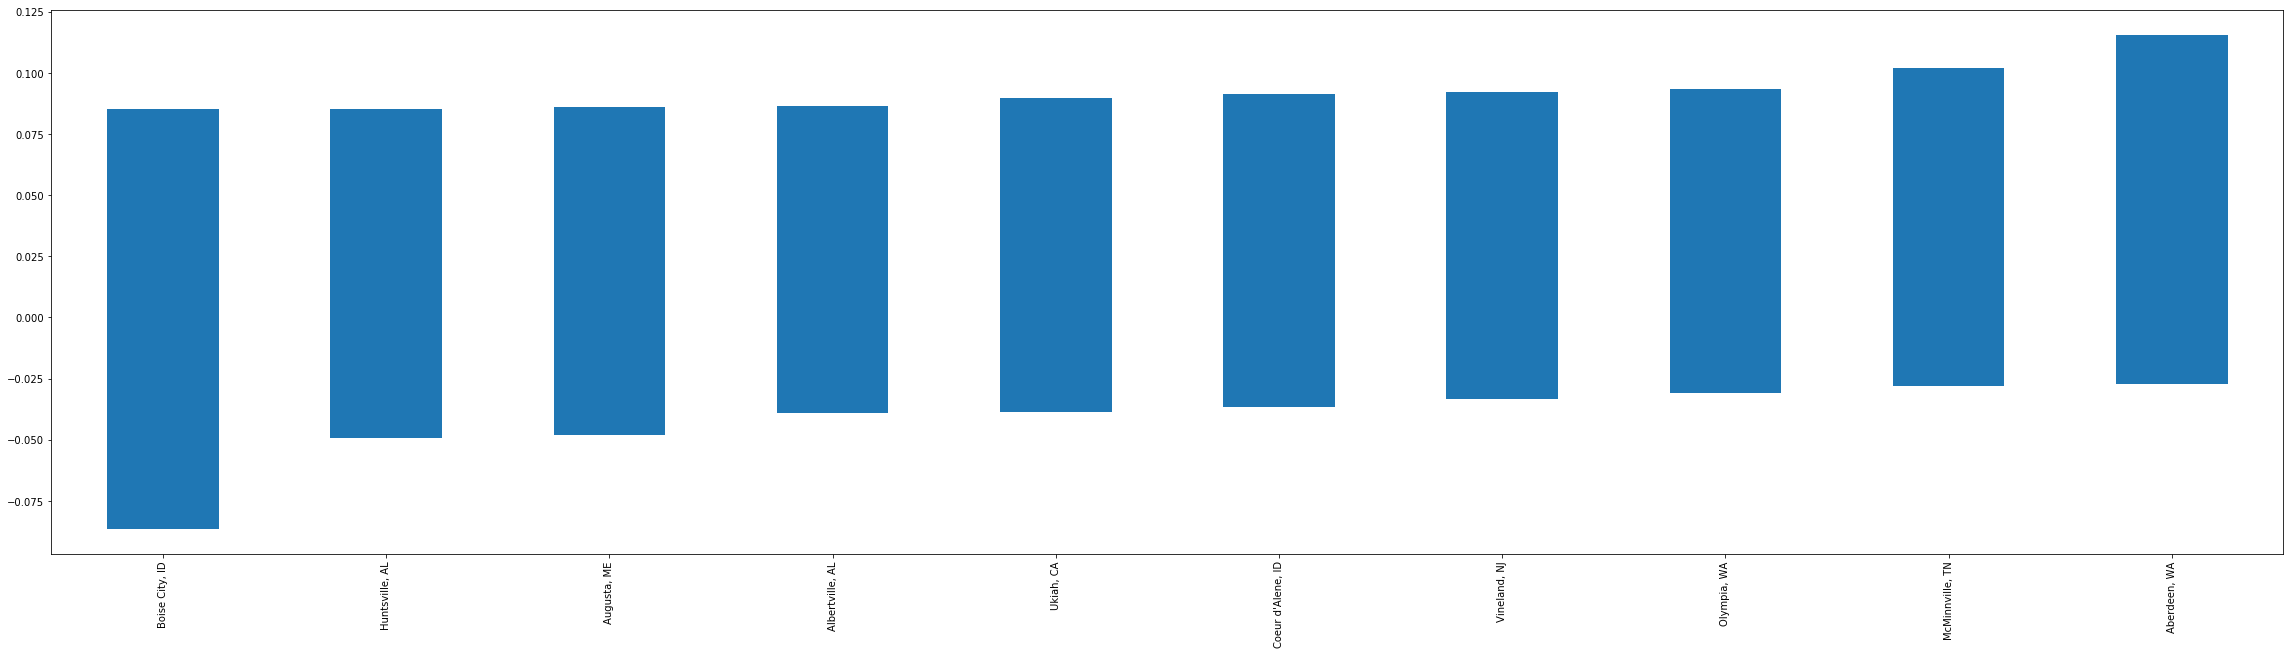

In [20]:
# Coronavirus impact
(house_price_df.loc['9/30/2020']/house_price_df.loc['2/29/2020']-1).sort_values().head(10).plot(kind='bar',figsize=(40,10))
(house_price_df.loc['9/30/2020']/house_price_df.loc['2/29/2020']-1).sort_values().tail(10).plot(kind='bar',figsize=(40,10))

In [21]:
# Import second file
# Read in CSV file
csv_path_2 = Path("../Data/rental_prices_msa.csv")
rental_price_raw = pd.read_csv(csv_path_2)

In [22]:
# split the RegionName into City and State columns
rental_price_raw[['City','State']] = rental_price_raw.RegionName.str.split(",",expand=True)
# Reorder the state and city col to the first two col
city_col_name="City"
state_col_name="State"
region_col_name="RegionName"
first_col = rental_price_raw.pop(city_col_name)
second_col = rental_price_raw.pop(state_col_name)
third_col = rental_price_raw.pop(region_col_name)
rental_price_raw.insert(0, city_col_name, first_col)
rental_price_raw.insert(1, state_col_name, second_col)
rental_price_raw.insert(2, region_col_name, third_col)
# Set index as City
rental_price_raw_indexed = rental_price_raw.set_index("City")
# Drop none float columns for analysis
rental_price_raw_indexed.drop(["State","RegionName","RegionID","SizeRank"], axis = 1, inplace = True) 
# Transpose columns
rental_price_df = rental_price_raw_indexed.transpose() 
rental_price_df

City,United States,New York,Los Angeles-Long Beach-Anaheim,Chicago,Dallas-Fort Worth,Philadelphia,Houston,Washington,Miami-Fort Lauderdale,Atlanta,...,Melbourne,Chattanooga,Spokane,Provo,Durham,Port St. Lucie,Fort Collins,Boulder,Greeley,Gainesville
2014-01,1354.0,2296.0,1857.0,1527.0,1222.0,1364.0,1272.0,1893.0,1571.0,1139.0,...,986.0,914.0,857.0,991.0,1173.0,1157.0,1239.0,1522.0,1252.0,978.0
2014-02,1360.0,2307.0,1870.0,1532.0,1228.0,1367.0,1282.0,1897.0,1578.0,1144.0,...,991.0,NaN,858.0,997.0,1175.0,1165.0,1252.0,1534.0,1262.0,981.0
2014-03,1366.0,2318.0,1884.0,1537.0,1234.0,1369.0,1292.0,1901.0,1586.0,1148.0,...,997.0,NaN,859.0,1004.0,1177.0,1173.0,1265.0,1547.0,1272.0,984.0
2014-04,1372.0,2329.0,1897.0,1542.0,1240.0,1372.0,1302.0,1905.0,1594.0,1152.0,...,1003.0,938.0,860.0,1010.0,1178.0,1181.0,1278.0,1560.0,1282.0,987.0
2014-05,1378.0,2339.0,1910.0,1546.0,1245.0,1374.0,1311.0,1909.0,1602.0,1157.0,...,1008.0,945.0,861.0,1016.0,1180.0,1189.0,1291.0,1572.0,1292.0,991.0
2014-06,1383.0,2350.0,1923.0,1551.0,1251.0,1377.0,1321.0,1912.0,1610.0,1161.0,...,1014.0,953.0,863.0,1023.0,1182.0,1196.0,1304.0,1585.0,1302.0,995.0
2014-07,1389.0,2360.0,1937.0,1555.0,1257.0,1379.0,1330.0,1916.0,1617.0,1166.0,...,1020.0,961.0,864.0,1029.0,1183.0,1204.0,1318.0,1598.0,1312.0,998.0
2014-08,1395.0,2371.0,1950.0,1560.0,1263.0,1382.0,1339.0,1920.0,1625.0,1171.0,...,1025.0,969.0,866.0,1035.0,1185.0,1212.0,1330.0,1611.0,1322.0,1002.0
2014-09,1401.0,2381.0,1963.0,1564.0,1268.0,1384.0,1349.0,1924.0,1633.0,1175.0,...,1031.0,976.0,867.0,1041.0,1187.0,1219.0,1343.0,1623.0,1332.0,1006.0
2014-10,1407.0,2392.0,1976.0,1568.0,1274.0,1387.0,1358.0,1927.0,1641.0,1180.0,...,1037.0,984.0,869.0,1047.0,1189.0,1227.0,1356.0,1636.0,1342.0,1010.0


In [23]:
# Pull the top 5 region names by average housing price
top_5_region_rental = rental_price_df.mean().nlargest(5)
top_5_region_rental.round(2)

City
San Francisco    2904.70
San Jose         2837.48
New York         2554.11
Ventura          2397.10
Boston           2364.98
dtype: float64

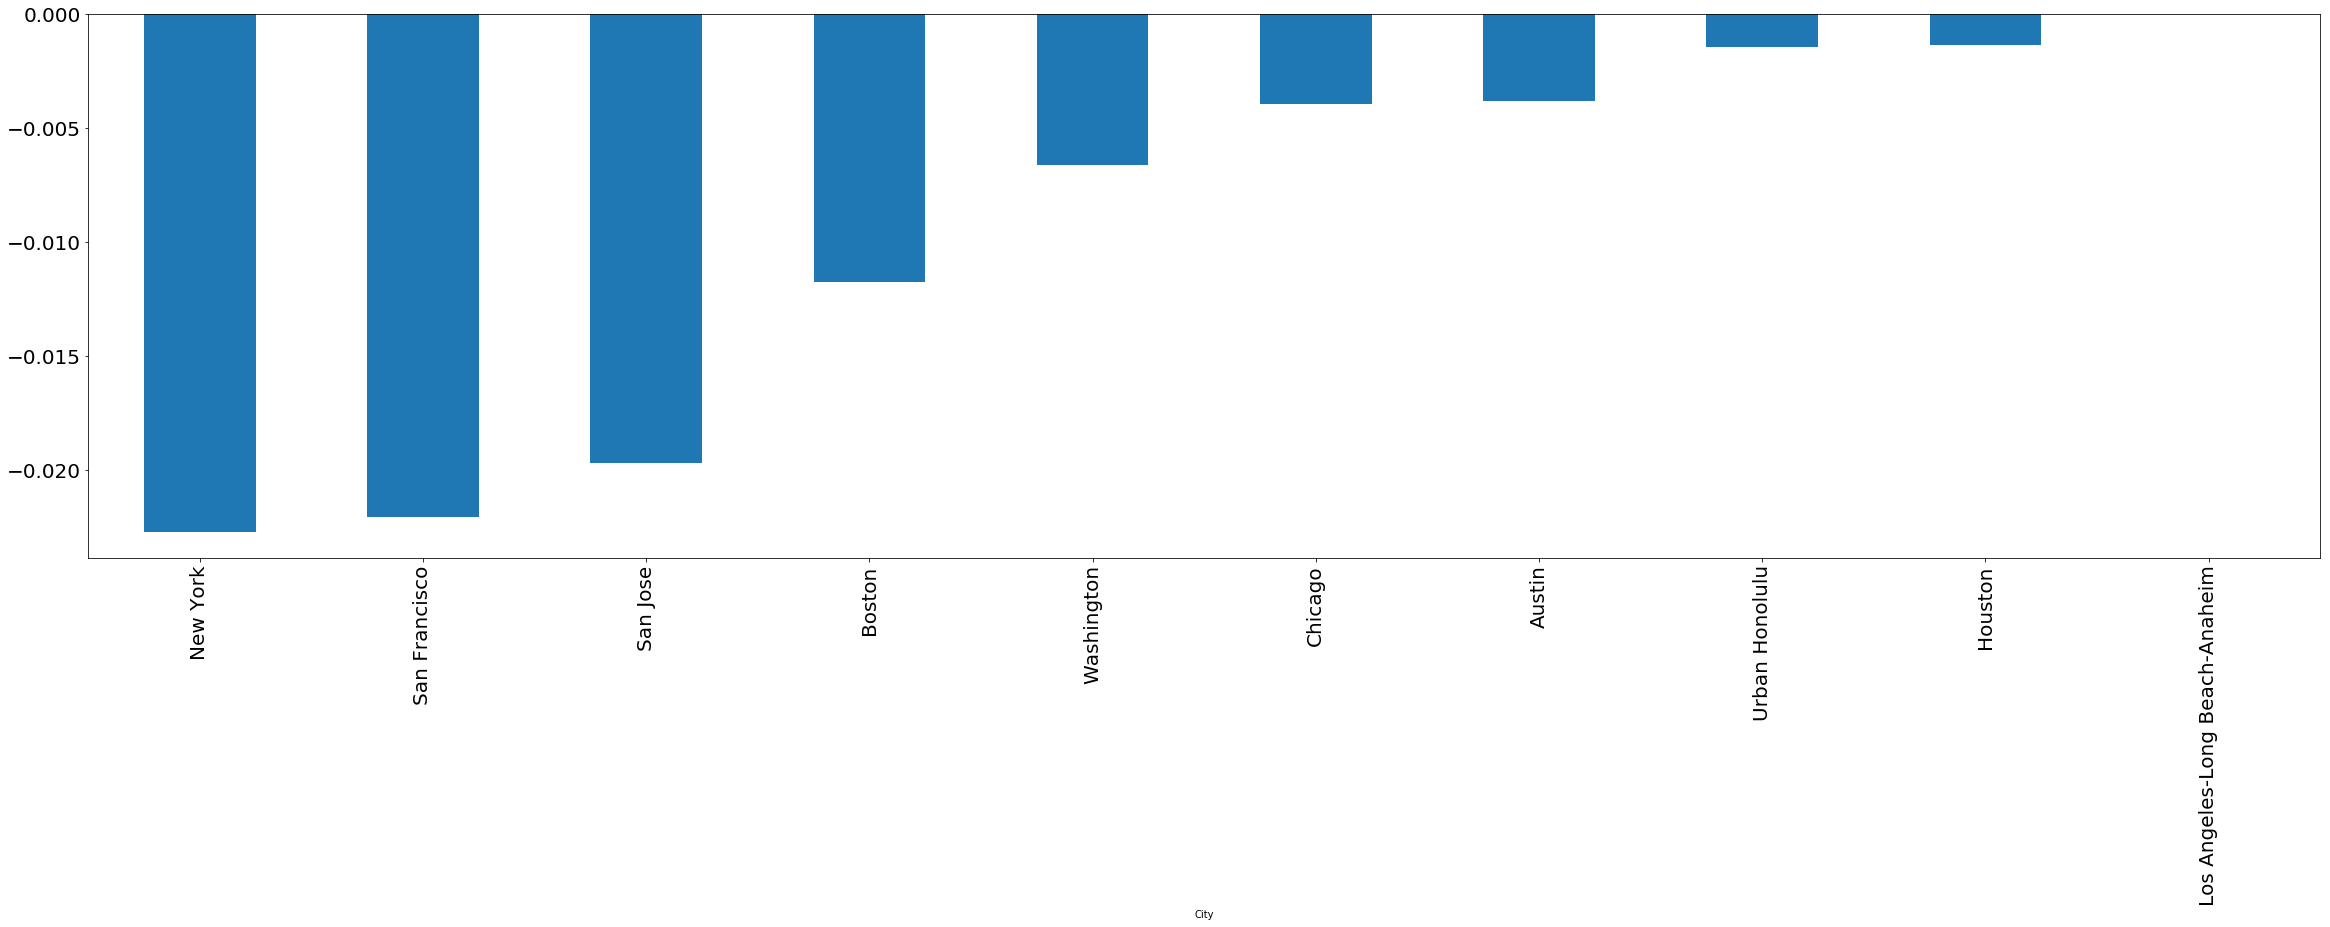

In [24]:
# Coronavirus impact 02/20 - 09/20 Top dec in rental price
((rental_price_df.loc['2020-09']/rental_price_df.loc['2020-02'])-1).sort_values().head(10).plot(kind='bar',figsize=(40,10),fontsize=(20))

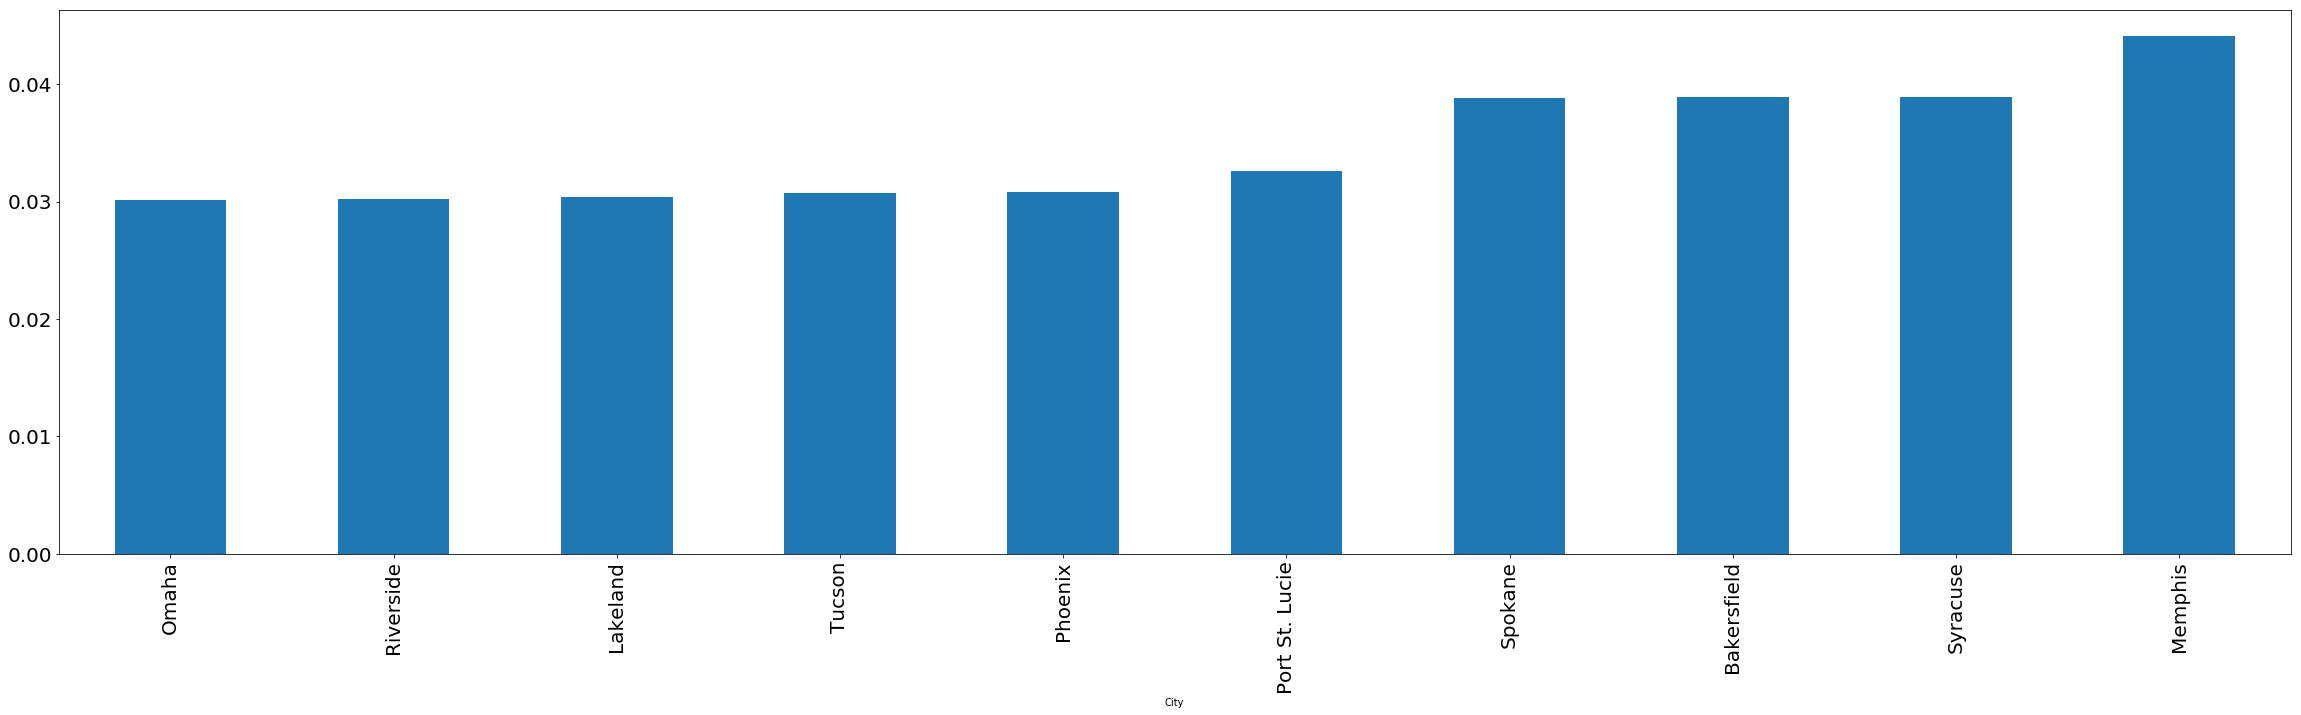

In [25]:
# Coronavirus impact 02/20 - 09/20 Top inc in rental price
((rental_price_df.loc['2020-09']/rental_price_df.loc['2020-02'])-1).sort_values().tail(10).plot(kind='bar',figsize=(40,10),fontsize=(20))

In [26]:
# YTD change 12/31/19 to 9/30/20
ytd_start_date="2019-12"
ytd_end_date="2020-09"

change_since_dec = rental_price_df.loc[ytd_end_date]/rental_price_df.loc[ytd_start_date]-1
change_since_dec

# change 09/19 to 09/20
yoy_start_date="2019-09"
yoy_end_date="2020-09"

yoy_change_rental = (rental_price_df.loc[yoy_end_date]/rental_price_df.loc[yoy_start_date])-1
yoy_change_rental

# Change 02/20 - 09/20

start_date="2020-02"
end_date="2020-09"

change_since_feb = (rental_price_df.loc[end_date]/rental_price_df.loc[start_date])-1

# Create dataframe to combine the % impact for two time frames
corona_impact_df = pd.DataFrame(change_since_dec,columns=["% Change since 12/2019"])
corona_impact_df["YOY change September 19-20"]=yoy_change_rental
corona_impact_df["% change since 02/20"]=change_since_feb

In [27]:
corona_impact_df.head(106)

,% Change since 12/2019,YOY change September 19-20,% change since 02/20
City,,,
United States,0.008245,0.014218,0.005875
New York,-0.027057,-0.027418,-0.022710
Los Angeles-Long Beach-Anaheim,0.001180,0.004737,0.000000
Chicago,-0.004499,-0.001692,-0.003939
Dallas-Fort Worth,0.007692,0.012234,0.005758
Philadelphia,0.010638,0.016362,0.008115
Houston,-0.001347,0.000675,-0.001347
Washington,-0.007533,-0.006129,-0.006598
Miami-Fort Lauderdale,0.010920,0.016205,0.007776


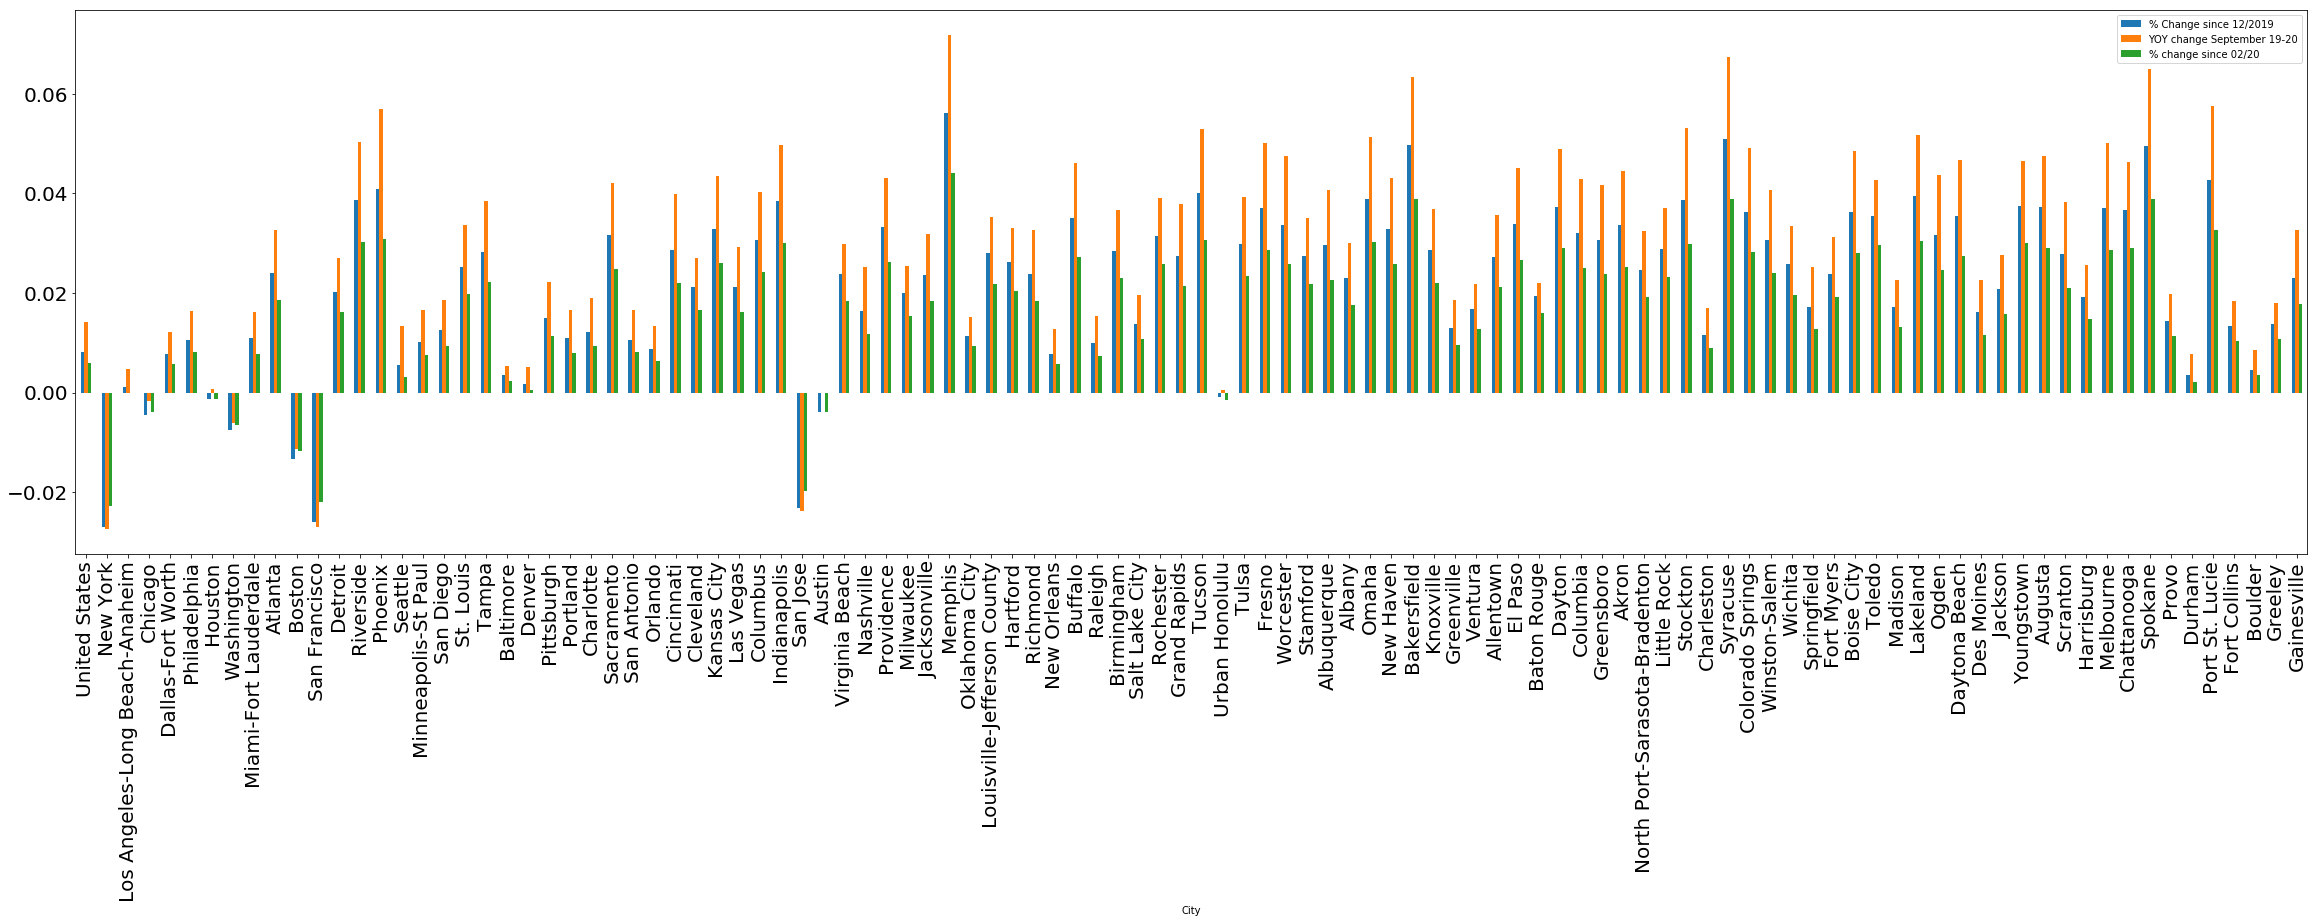

In [28]:
corona_impact_df.plot(kind='bar',figsize=(40,10),fontsize=(20))

In [32]:
# Read Mapbox API Key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [38]:
# read the house_prices_msa.csv. this file will be used for sale price data
file_name='house_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")
house_price_df= pd.read_csv(csv_file)
# house_price_df.head(2)

# Cleaning and re arranging data 
house_price_df.set_index(house_price_df['RegionName'],inplace=True)
house_price_df=house_price_df.drop(columns=['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])


# Create columns with city and state to allow more flexibility when showing data
house_price_df.index.rename('MSA_interim', inplace=True)
house_price_df.reset_index(inplace=True)

# DELETE house_price_df.rename(columns={'index':'MSA'}, inplace= True)
house_price_df[['city_interim','State']] = house_price_df['MSA_interim'].str.split(", ", n = 1, expand=True) # Split City from text string

# Keep first city in list; e.g Dallas-Fort Worth will be dallas
house_price_df[['City','Extra1']] = house_price_df['city_interim'].str.split("-", n = 1, expand=True) # Split Cities from text string

# Create nique identifier
house_price_df['MSA']=house_price_df['City']+', '+house_price_df['State']

# Replace United States that is NAN. Confirmed is the only null with house_price_df['MSA'].isna().sum()
house_price_df['MSA'].fillna('United States',inplace=True)

house_price_df.set_index('MSA',inplace=True)

house_price_df=house_price_df.drop(columns=['city_interim','State', 'City', 'Extra1','MSA_interim'])


# Transpose dataframe
house_price_df=house_price_df.transpose()
# Drop the name that would look as the name of the index otherwise
house_price_df.columns.name = None


house_price_df.head(5)
# region_id_df.plot(legend=False) 


,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
1/31/1996,107630.0,187842.0,183929.0,164647.0,114406.0,121233.0,110773.0,178034.0,109403.0,120291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60501.0,NaN,NaN,NaN
2/29/1996,107657.0,187403.0,184185.0,164345.0,114471.0,121078.0,110849.0,177811.0,109533.0,120519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60725.0,NaN,NaN,NaN
3/31/1996,107707.0,187125.0,184205.0,163946.0,114634.0,120937.0,110858.0,177681.0,109670.0,120740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60961.0,NaN,NaN,NaN
4/30/1996,107834.0,186592.0,184312.0,163493.0,114962.0,120693.0,111007.0,177407.0,109917.0,121229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61420.0,NaN,NaN,NaN
5/31/1996,107977.0,186274.0,184286.0,162886.0,115314.0,120527.0,111148.0,177288.0,110132.0,121711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61747.0,NaN,NaN,NaN


In [39]:
# Calcuate variables from house database 

# Change in price since February, prior to COVID hit in March
end_date='9/30/2020'
start_date='2/29/2020'
change_since_feb=house_price_df.loc[end_date]/house_price_df.loc[start_date]-1


# sale_stats_df=pd.DataFrame([[change_since_feb,avg_last_12m]],columns=['% Change Since Feb','AVG Last 12M'])
sale_stats_df=pd.DataFrame(change_since_feb,columns=['% Sale Price Change Since Feb'])


# df.index = df["Index Title"]
# Last 12 Months average: to show cost and avoid intra month volatility
avg_last_12m=house_price_df.iloc[-12:,:].mean()
sale_stats_df['Avg Sale Price Last 12M']=avg_last_12m

# Most Recent Data Point
last_price=house_price_df.iloc[-1,:]
sale_stats_df['Sale Price Last']=last_price


# Calculate CAGR: Min post GFC to Most Recent Date
# Add a column with most recent date
# Create a column that i will drop with last_date - used to calculate number of periods
sale_stats_df['last_date']=house_price_df.index[-1]
sale_stats_df['last_date']=pd.to_datetime(sale_stats_df['last_date'], errors='coerce')


#  Found the minimum data point after the GFC for each MSA
# Create a column that i will drop with last_date - used to calculate number of periods
sale_stats_df['gfc_min']=house_price_df.loc['1/31/2008':].idxmin()
sale_stats_df['gfc_min']=pd.to_datetime(sale_stats_df['gfc_min'], errors='coerce')

# Populate the minimum value from series
sale_stats_df['gfc_min_value']=house_price_df.loc['1/31/2008':].min()


# calculate the number of periods
sale_stats_df['months_diff'] = sale_stats_df['last_date'].dt.to_period('M').astype(int)-sale_stats_df['gfc_min'].dt.to_period('M').astype(int)

# Actual CAGR
period=12
sale_stats_df['Sale Pr CAGR GFC']=(sale_stats_df['Sale Price Last']/sale_stats_df['gfc_min_value'])**(period*1/sale_stats_df['months_diff'])-1


# Calculate Standard Deviation and I annualize
monthly_returns_sales_df=house_price_df.pct_change()
monthly_std_sales_df=monthly_returns_sales_df.std()#* np.sqrt(12)
sale_stats_df['Sale Pr Standard Deviation']=monthly_returns_sales_df.std()* np.sqrt(12)


In [40]:
# Create columns with city and state to allow more flexibility when showing data
# sale_stats_df[['City','State']] = sale_stats_df['MSA'].str.split(", ", n = 1, expand=True) # Split City from text string
sale_stats_df.reset_index(inplace=True)
# sale_stats_df['index'].name='MSA'
sale_stats_df.rename(columns={'index':'MSA'}, inplace= True)
sale_stats_df[['City','State']] = sale_stats_df['MSA'].str.split(", ", n = 1, expand=True) # Split City from text string
sale_stats_df.set_index('MSA',inplace=True)

In [41]:
# re arrange order and drop columns we do not need
sale_stats_df=sale_stats_df[['City','State','% Sale Price Change Since Feb', 'Avg Sale Price Last 12M', 'Sale Price Last', 'Sale Pr CAGR GFC','Sale Pr Standard Deviation']]
sale_stats_df.head(5)

# sale_stats_df[sale_stats_df['City']=='Longview']

,City,State,% Sale Price Change Since Feb,Avg Sale Price Last 12M,Sale Price Last,Sale Pr CAGR GFC,Sale Pr Standard Deviation
MSA,,,,,,,
United States,United States,None,0.041127,251932.416667,259906.0,0.056108,0.015617
"New York, NY",New York,NY,0.031853,485123.166667,497090.0,0.036593,0.018566
"Los Angeles, CA",Los Angeles,CA,0.045627,686194.416667,711361.0,0.073333,0.031222
"Chicago, IL",Chicago,IL,0.030465,247694.583333,253512.0,0.044707,0.022278
"Dallas, TX",Dallas,TX,0.036259,263875.916667,270907.0,0.073495,0.012663


In [43]:
##Latitude, Longitude, Population Data Base
###Cleaning and Re arranging

In [44]:
file_name='uscities.csv'
csv_file=Path(f"../Data/{file_name}")
lon_lat_density_df= pd.read_csv(csv_file)
lon_lat_density_df.head(2)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491


In [45]:
# read the uscities csv. this file will be used for the longitude and latitude, as well as the density stats and population filters
file_name='uscities.csv'
csv_file=Path(f"../Data/{file_name}")
lon_lat_density_df= pd.read_csv(csv_file)
# lon_lat_density_df.head(2)

# getting first zipcode from list of zipcodes and create primary MSA from stateid and city
lon_lat_density_df['Zip Code'] = lon_lat_density_df['zips'].str.split(", ", n = 1, expand=True)
lon_lat_density_df['Zip Code'] = lon_lat_density_df['zips'].str[:5]

# Creating Unique ID: city + State
lon_lat_density_df['MSA']= lon_lat_density_df['city_ascii'].str[:]+', '+lon_lat_density_df['state_id'].str[:2]

# Rename Columns
lon_lat_density_df.rename(columns={'city_ascii':'City','state_id':'State','lng':'lon','population':'Population','density':'Density'},inplace=True)

# dropping unnecessary columns, reording columns and setting index
lon_lat_density_df=lon_lat_density_df[['MSA','City','State', 'Population','Density','Zip Code','lat', 'lon']]
lon_lat_density_df.drop_duplicates()
lon_lat_density_df=lon_lat_density_df.set_index('MSA')
lon_lat_density_df.head(5)

# This data set has informatio for more cities than sales and rental databases
# (longlatdensity_df[longlatdensity_df['population']>100000])

,City,State,Population,Density,Zip Code,lat,lon
MSA,,,,,,,
"New York, NY",New York,NY,18713220.0,10715.0,11229,40.6943,-73.9249
"Los Angeles, CA",Los Angeles,CA,12750807.0,3276.0,90291,34.1139,-118.4068
"Chicago, IL",Chicago,IL,8604203.0,4574.0,60018,41.8373,-87.6862
"Miami, FL",Miami,FL,6445545.0,5019.0,33129,25.7839,-80.2102
"Dallas, TX",Dallas,TX,5743938.0,1526.0,75287,32.7936,-96.7662


In [46]:
## Rental Sales Data Base
## Cleaning and Re arranging

In [47]:
# read the house_prices_msa.csv. this file will be used for sale price data
file_name='rental_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")
rental_price_df= pd.read_csv(csv_file)
rental_price_df.head(2)

# Cleaning and re arranging data 
rental_price_df.set_index(rental_price_df['RegionName'],inplace=True)
rental_price_df=rental_price_df.drop(columns=['RegionID','SizeRank','RegionName'])

rental_price_df.index.rename('MSA_interim', inplace=True)
rental_price_df.reset_index(inplace=True)



# Create State and City - will delete after i create unique ID
rental_price_df[['city_interim','State']] = rental_price_df['MSA_interim'].str.split(", ", n = 1, expand=True) # Split City from text string

# Keep first city in list; e.g Dallas-Fort Worth will be dallas
rental_price_df[['City','Extra1']] = rental_price_df['city_interim'].str.split("-", n = 1, expand=True) # Split Cities from text string

# Create nique identifier
rental_price_df['MSA']=rental_price_df['City']+', '+rental_price_df['State']

# Replace United States that is NAN. Confirmed is the only null with house_price_df['MSA'].isna().sum()
rental_price_df['MSA'].fillna('United States',inplace=True)

rental_price_df.set_index('MSA',inplace=True)

# Delete columns i do not need
rental_price_df=rental_price_df.drop(columns=['city_interim','State', 'City', 'Extra1','MSA_interim'])


# Transpose data frame
rental_price_df=rental_price_df.transpose()
rental_price_df.columns.name = None

# Drop duplicated columns
# rental_price_df=rental_price_df.loc[:,~rental_price_df.columns.duplicated()]

# rental_price_df.index.dt.to_period('M').astype(int)
rental_price_df.head(5)



,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami, FL","Atlanta, GA",...,"Melbourne, FL","Chattanooga, TN","Spokane, WA","Provo, UT","Durham, NC","Port St. Lucie, FL","Fort Collins, CO","Boulder, CO","Greeley, CO","Gainesville, GA"
2014-01,1354.0,2296.0,1857.0,1527.0,1222.0,1364.0,1272.0,1893.0,1571.0,1139.0,...,986.0,914.0,857.0,991.0,1173.0,1157.0,1239.0,1522.0,1252.0,978.0
2014-02,1360.0,2307.0,1870.0,1532.0,1228.0,1367.0,1282.0,1897.0,1578.0,1144.0,...,991.0,NaN,858.0,997.0,1175.0,1165.0,1252.0,1534.0,1262.0,981.0
2014-03,1366.0,2318.0,1884.0,1537.0,1234.0,1369.0,1292.0,1901.0,1586.0,1148.0,...,997.0,NaN,859.0,1004.0,1177.0,1173.0,1265.0,1547.0,1272.0,984.0
2014-04,1372.0,2329.0,1897.0,1542.0,1240.0,1372.0,1302.0,1905.0,1594.0,1152.0,...,1003.0,938.0,860.0,1010.0,1178.0,1181.0,1278.0,1560.0,1282.0,987.0
2014-05,1378.0,2339.0,1910.0,1546.0,1245.0,1374.0,1311.0,1909.0,1602.0,1157.0,...,1008.0,945.0,861.0,1016.0,1180.0,1189.0,1291.0,1572.0,1292.0,991.0


In [48]:
# Calcuate variables from house database 

# Change in price since February, prior to COVID hit in March
end_date=rental_price_df.index[-1]
start_date='2020-02'
change_since_feb=rental_price_df.loc[end_date]/rental_price_df.loc[start_date]-1


# sale_stats_df=pd.DataFrame([[change_since_feb,avg_last_12m]],columns=['% Change Since Feb','AVG Last 12M'])
rent_stats_df=pd.DataFrame(change_since_feb,columns=['% Rent Change Since Feb'])


# df.index = df["Index Title"]
# Last 12 Months average: to show cost and avoid intra month volatility
avg_last_12m=rental_price_df.iloc[-12:,:].mean()
rent_stats_df['Avg Monthly Rent Last 12M']=avg_last_12m

# Annualized Last 12 Months average: to calculate affordability
rent_stats_df['Last 12M Annualized Rent']=avg_last_12m*12


# Most Recent Data Point
last_price=rental_price_df.iloc[-1,:]
rent_stats_df['Monthly Rent Last']=last_price


# Calculate CAGR: 2014-01 or oldest data point if 2014-01 not available
# Add a column with most recent date
# Create a column that i will drop with last_date - used to calculate number of periods
rent_stats_df['last_date']=rental_price_df.index[-1]
rent_stats_df['last_date']=pd.to_datetime(rent_stats_df['last_date'], errors='coerce')

# Found the minimum data point after the GFC for each MSA
# Create a column that i will drop with last_date - used to calculate number of periods
rent_stats_df['oldest_date']=rental_price_df.index[0] # i need to populate the right data point
# rent_stats_df['oldest_date1']=rental_price_df.apply(pd.Series.first_valid_index)

rent_stats_df['oldest_date']=pd.to_datetime(rent_stats_df['oldest_date'], errors='coerce')
# s.loc[~s.isnull()].iloc[0] 


# Populate the minimum value from series
# make this date variable // ask
rent_stats_df['oldest_value']= rental_price_df.iloc[0] 
##rental_price_df.iloc[rental_price_df.apply(pd.Series.first_valid_index)]     #rental_price_df.loc[rental_price_df.notna().idxmax()] # rental_price_df.loc[rental_price_df.apply(pd.Series.first_valid_index)] 
#rental_price_df.loc[rental_price_df.apply(pd.Series.first_valid_index)]


# calculate the number of periods
rent_stats_df['months_diff'] = rent_stats_df['last_date'].dt.to_period('M').astype(int)-rent_stats_df['oldest_date'].dt.to_period('M').astype(int)

# Actual CAGR
period=12
rent_stats_df['Rent CAGR since 2014-01']=(rent_stats_df['Monthly Rent Last']/rent_stats_df['oldest_value'])**(period*1/rent_stats_df['months_diff'])-1


# Calculate Standard Deviation and I annualize
monthly_rent_change_df=rental_price_df.pct_change()
monthly_std_sales_df=monthly_rent_change_df.std()*np.sqrt(12)
rent_stats_df['Rent Standard Deviation']=monthly_returns_sales_df.std()


# Create columns with city and state to allow more flexibility when showing data
# sale_stats_df[['City','State']] = sale_stats_df['MSA'].str.split(", ", n = 1, expand=True) # Split City from text string
rent_stats_df.reset_index(inplace=True)
rent_stats_df.rename(columns={'index':'MSA'}, inplace= True)
rent_stats_df[['City','State']] = rent_stats_df['MSA'].str.split(", ", n = 1, expand=True) # Split City from text string
rent_stats_df.set_index('MSA',inplace=True)


# re arrange order and drop columns we do not need
rent_stats_df=rent_stats_df[['City', 'State', '% Rent Change Since Feb', 'Avg Monthly Rent Last 12M', 'Last 12M Annualized Rent','Monthly Rent Last' ,'Rent CAGR since 2014-01','Rent Standard Deviation']]

rent_stats_df.head(5)

,City,State,% Rent Change Since Feb,Avg Monthly Rent Last 12M,Last 12M Annualized Rent,Monthly Rent Last,Rent CAGR since 2014-01,Rent Standard Deviation
MSA,,,,,,,,
United States,United States,None,0.005875,1703.916667,20447.0,1712.0,0.035816,0.004508
"New York, NY",New York,NY,-0.022710,2670.916667,32051.0,2625.0,0.020290,0.005360
"Los Angeles, CA",Los Angeles,CA,0.000000,2544.166667,30530.0,2545.0,0.048411,0.009013
"Chicago, IL",Chicago,IL,-0.003939,1775.083333,21301.0,1770.0,0.022398,0.006431
"Dallas, TX",Dallas,TX,0.005758,1564.750000,18777.0,1572.0,0.038502,0.003656


In [49]:
## Median Income Data Base
## Cleaning and Re arranging

In [50]:
# Using median income CSV files from EH notebook. 
# data cleanup using EH notebook. Differences are: (created new medican_income_affdf for affordability df calc)

# read the house_prices_msa.csv. this file will be used for sale price data
file_name='household_income_msa_2019.csv'
csv_file=Path(f"../Data/{file_name}")
median_income_df= pd.read_csv(csv_file)
median_income_df.head(2)

# Transpose the column/headers
median_income_df = median_income_df.transpose() 

#grab the first row for the header
new_header = median_income_df.iloc[0] 

#take the data less the header row
median_income_df = median_income_df[1:] 

#set the header row as the df header
median_income_df.columns = new_header 

# Use only median and mean income data columns
median_income_df = median_income_df[['Median income (dollars)','Mean income (dollars)']] 
median_income_df.reset_index(inplace=True)

# Split MSA from text string
median_income_df[['MSA','extra']] = median_income_df['index'].str.split(",", n = 1, expand=True) 

# Split State from remaining text string
median_income_df[['State','extra2']] = median_income_df['extra'].str.split(n = 1, expand=True) 

# Split Primary MSA from first text string
median_income_df[['Primary MSA1','Secondary MSA']] = median_income_df['MSA'].str.split("-", n = 1, expand=True) 

# Split Primary MSA from first text string
median_income_df[['Primary State','Secondary State']] = median_income_df['State'].str.split("-", n = 1, expand=True) 

# Drop unnecessary columns
median_income_df.drop(columns=['index','extra','extra2','MSA','State'],inplace=True) 

# Drop duplicates -- first instance is the median and mean income by MSA
median_income_df.drop_duplicates(subset=['Primary MSA1','Primary State'], inplace=True) 

median_income_df['MSA']= median_income_df['Primary MSA1']+", "+median_income_df['Primary State']
median_income_df = median_income_df[["MSA", "Median income (dollars)", "Mean income (dollars)"]]

# Drop the name that would look as the name of the index otherwise
median_income_df.columns.name = None

#creating filtered dataframe for affordability calc
# median_income_affdf=median_income_df.filter(['Primary MSA','Median income (dollars)','Mean income (dollars)'], axis=1)
median_income_df=median_income_df.set_index("MSA")
median_income_df.head(5)



,Median income (dollars),Mean income (dollars)
MSA,,
"Aberdeen, WA","61,026","77,948"
"Abilene, TX","54,808","71,517"
"Adrian, MI","53,865","69,443"
"Aguadilla, PR","16,311","25,781"
"Akron, OH","57,158","80,800"


In [51]:
# Further cleaning the columns median income and average income
# Nika, what Are we doing here?
median_income_df['Median income (dollars)'] =median_income_df['Median income (dollars)'].apply(lambda x: float(x.split()[0].replace(',', '')))
median_income_df['Mean income (dollars)']=median_income_df['Mean income (dollars)'].apply(lambda x: float(x.split()[0].replace(',', '')))

# Nika, what Are we doing here?
median_income_df['Median income (dollars)']=median_income_df['Median income (dollars)'].astype(str).astype(float)
median_income_df['Mean income (dollars)']=median_income_df['Mean income (dollars)'].astype(str).astype(float)

In [52]:
# Merging of 4 data sets:¶
# Sales Data
# Rent Data
# Lat, Lon, Density Data

In [60]:
# List of clean databases
# sale_stats_df
# rent_stats_df
# lon_lat_density_df

# Remove duplicate columns in merge
sale_clean=sale_stats_df.drop(columns=['City','State'])
rent_clean=rent_stats_df.drop(columns=['City','State'])

combined_df = pd.merge(sale_clean,rent_clean,how='outer',on='MSA')
combined_df = pd.merge(lon_lat_density_df,combined_df,how='outer',on='MSA')
combined_df = pd.merge(median_income_df,combined_df,how='inner',on='MSA')

# (combined_df[combined_df.index=='New York, NY']).sort_index()
# combined_df[combined_df['City_x']=='New York'].sort_index()
combined_df[combined_df['State']=='NY'].sort_index()
# combined_df
# (longlatdensity_df[longlatdensity_df['population']>100000])

# affordability_df= pd.merge(firstmerge, rental_price_2019_affdf,on='Primary MSA')
# affordability_df.head(5)
combined_df.head(500)

,Median income (dollars),Mean income (dollars),City,State,Population,Density,Zip Code,lat,lon,% Sale Price Change Since Feb,Avg Sale Price Last 12M,Sale Price Last,Sale Pr CAGR GFC,Sale Pr Standard Deviation,% Rent Change Since Feb,Avg Monthly Rent Last 12M,Last 12M Annualized Rent,Monthly Rent Last,Rent CAGR since 2014-01,Rent Standard Deviation
MSA,,,,,,,,,,,,,,,,,,,,
"Aberdeen, WA",61026.0,77948.0,Aberdeen,WA,29609.0,595.0,98520,46.9757,-123.8094,0.115593,200856.333333,218200.0,0.090982,0.025883,NaN,NaN,NaN,NaN,NaN,NaN
"Abilene, TX",54808.0,71517.0,Abilene,TX,116412.0,446.0,79605,32.4543,-99.7384,0.031731,142951.000000,146251.0,0.042755,0.012530,NaN,NaN,NaN,NaN,NaN,NaN
"Adrian, MI",53865.0,69443.0,Adrian,MI,43689.0,994.0,49221,41.8994,-84.0446,0.036323,156752.916667,161342.0,0.058864,0.017916,NaN,NaN,NaN,NaN,NaN,NaN
"Aguadilla, PR",16311.0,25781.0,Aguadilla,PR,11170.0,1721.0,00603,18.4382,-67.1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Akron, OH",57158.0,80800.0,Akron,OH,565208.0,1231.0,44306,41.0798,-81.5219,0.045898,157027.416667,162588.0,0.043217,0.011954,0.025287,874.333333,10492.0,892.0,0.030308,0.003451
"Alamogordo, NM",39371.0,54602.0,Alamogordo,NM,33513.0,577.0,88310,32.8837,-105.9624,0.037123,133752.416667,137705.0,0.043571,0.009688,NaN,NaN,NaN,NaN,NaN,NaN
"Albany, GA",40625.0,57777.0,Albany,GA,89217.0,505.0,31721,31.5776,-84.1762,-0.006195,110595.416667,109881.0,0.040296,0.012140,NaN,NaN,NaN,NaN,NaN,NaN
"Albany, OR",61488.0,74582.0,Albany,OR,62880.0,1218.0,97321,44.6274,-123.0966,0.050312,289126.166667,299865.0,0.083466,0.023135,NaN,NaN,NaN,NaN,NaN,NaN
"Albany, NY",73398.0,92433.0,Albany,NY,586383.0,1740.0,12208,42.6664,-73.7987,0.035823,207364.250000,213333.0,0.023027,0.014708,0.017530,1316.833333,15802.0,1335.0,0.027518,0.004246


In [68]:
#Calculating affordability
combined_df['Affordability Rent/Median Inc']=combined_df['Last 12M Annualized Rent']/combined_df['Median income (dollars)']
combined_df['Affordability Rent/Avg Inc']=combined_df['Last 12M Annualized Rent']/combined_df['Mean income (dollars)']

combined_df.head(1000)
combined_df_clean = combined_df.dropna()
combined_df_clean.head(1000)

,Median income (dollars),Mean income (dollars),City,State,Population,Density,Zip Code,lat,lon,% Sale Price Change Since Feb,...,Sale Pr CAGR GFC,Sale Pr Standard Deviation,% Rent Change Since Feb,Avg Monthly Rent Last 12M,Last 12M Annualized Rent,Monthly Rent Last,Rent CAGR since 2014-01,Rent Standard Deviation,Affordability Rent/Median Inc,Affordability Rent/Avg Inc
MSA,,,,,,,,,,,,,,,,,,,,,
"Akron, OH",57158.0,80800.0,Akron,OH,565208.0,1231.0,44306,41.0798,-81.5219,0.045898,...,0.043217,0.011954,0.025287,874.333333,10492.0,892.0,0.030308,0.003451,0.183561,0.129851
"Albany, NY",73398.0,92433.0,Albany,NY,586383.0,1740.0,12208,42.6664,-73.7987,0.035823,...,0.023027,0.014708,0.017530,1316.833333,15802.0,1335.0,0.027518,0.004246,0.215292,0.170956
"Albuquerque, NM",58512.0,79305.0,Albuquerque,NM,761195.0,1155.0,87121,35.1053,-106.6464,0.060901,...,0.038573,0.015395,0.022530,1159.250000,13911.0,1180.0,0.030791,0.004444,0.237746,0.175411
"Allentown, PA",70793.0,90785.0,Allentown,PA,683794.0,2672.0,18105,40.5961,-75.4756,0.053828,...,0.030811,0.017027,0.021230,1372.333333,16468.0,1395.0,0.032518,0.004915,0.232622,0.181396
"Atlanta, GA",71742.0,99456.0,Atlanta,GA,5449398.0,1441.0,30334,33.7627,-84.4224,0.042744,...,0.081835,0.020812,0.018650,1561.500000,18738.0,1584.0,0.050714,0.006008,0.261186,0.188405
"Austin, TX",80954.0,109564.0,Austin,TX,1687311.0,1181.0,78749,30.3004,-97.7522,0.058305,...,0.065470,0.013944,-0.003812,1572.166667,18866.0,1568.0,0.032245,0.004025,0.233046,0.172192
"Bakersfield, CA",53067.0,75669.0,Bakersfield,CA,579295.0,990.0,93306,35.3529,-119.0359,0.057096,...,0.075079,0.040477,0.038920,1269.833333,15238.0,1308.0,0.038774,0.011685,0.287146,0.201377
"Baltimore, MD",83160.0,110712.0,Baltimore,MD,2106068.0,2830.0,21218,39.3051,-76.6144,0.036609,...,0.024738,0.020538,0.002401,1666.666667,20000.0,1670.0,0.014117,0.005929,0.240500,0.180649
"Baton Rouge, LA",60746.0,83103.0,Baton Rouge,LA,570308.0,983.0,70836,30.4418,-91.1310,0.020671,...,0.020418,0.014894,0.015913,1198.333333,14380.0,1213.0,0.019566,0.004299,0.236723,0.173038


In [72]:
# Mapbox for covid impact color
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(mapbox_token)

combined_df_clean.reset_index()

map = px.scatter_mapbox(
    combined_df_clean,
    lat="lat",
    lon="lon",
    size="Density",
    color="% Rent Change Since Feb",
    hover_name="City",
    hover_data=["% Sale Price Change Since Feb"],
    zoom=3,
    color_continuous_scale=px.colors.diverging.Portland)


map.update_layout(title='Covid Impact on US cities Rent and Sale prices')
map.show()